# Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) 
had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership.
The company wants to figure out what went wrong.

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
media = pd.read_csv("mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
media.shape

(80, 8)

In [5]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 4.8+ KB


In [6]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [7]:
#Drop "Unnamed: 7" --- col
media = media.drop('Unnamed: 7', axis=1)

In [8]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.1+ KB


In [9]:
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'])

In [10]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [11]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null datetime64[ns]
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.4 KB


In [12]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [13]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
75,2017-05-15,313945,1808684,2226788,1398052759,1,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0
79,2017-05-19,108961,1746735,2279036,1246026846,1,0


In [14]:
#Deriving day since the show stared 
from datetime import datetime

d0 = datetime(2017, 2, 28)
d1 = media.Date
delta = d1 - d0
media['day'] = delta

In [15]:
media.head(80)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76 days
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77 days
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78 days
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79 days


In [16]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])   #The advantage of the lambda operator can be seen when it is used in combination with the map() function.
                                                    #map() is a function with two arguments:
                                                    #r = map(func, seq)
                                                    #The first argument func is the name of a function and the second a sequence (e.g. a list) seq. map()
                                                    #applies the function func to all the elements of the sequence seq. 
                                                    #It returns a new list with the elements changed by func
media['day'] = media['day'].astype(int)

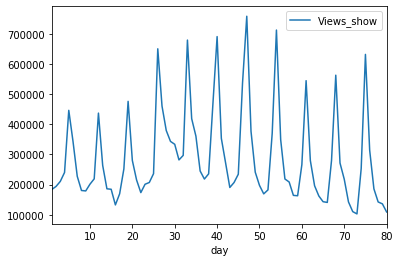

In [17]:
# day vs views show
media.plot.line(x='day', y = 'Views_show')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


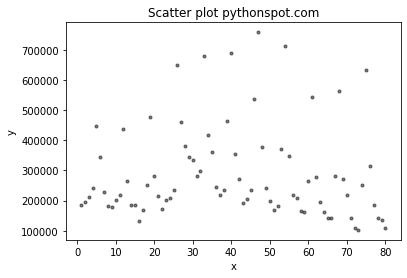

In [18]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

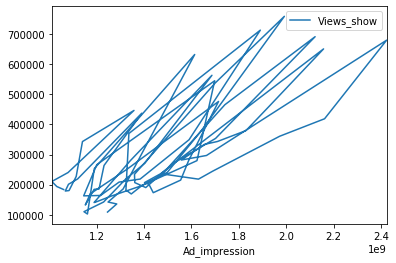

In [20]:
# day vs views show
media.plot.line(x='Ad_impression', y = 'Views_show')

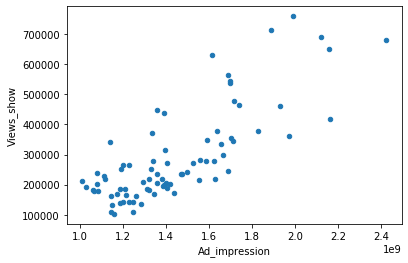

In [21]:
# scatter ad_impression and views_show
media.plot.scatter(x='Ad_impression', y = 'Views_show')

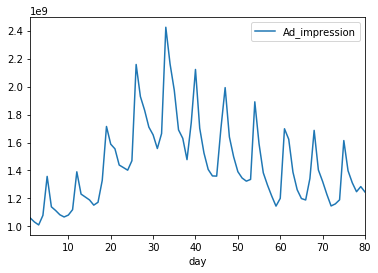

In [22]:
media.plot.line(x= 'day', y='Ad_impression')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


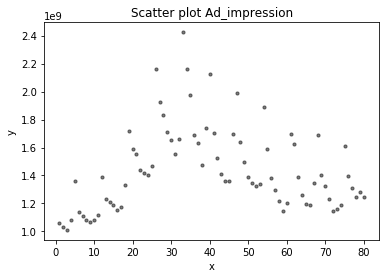

In [29]:
# Scatter Plot (days vs Ad_impression)
colors = (0,0,0)
#area = np.pi*3
plt.scatter(media.day, media.Ad_impression, s=10, c=colors, alpha=0.5)
plt.title('Scatter plot Ad_impression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

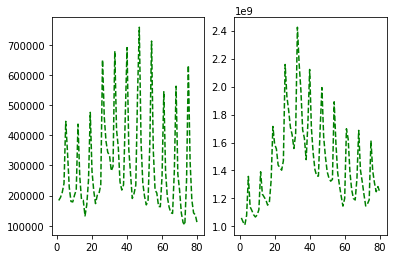

In [33]:
#plot day vs Ad_impression and Views_show side by side
plt.subplot(1,2,1)
plt.plot(media.day,media.Views_show,'g--')
plt.subplot(1,2,2)
plt.plot(media.day,media.Ad_impression,'g--')

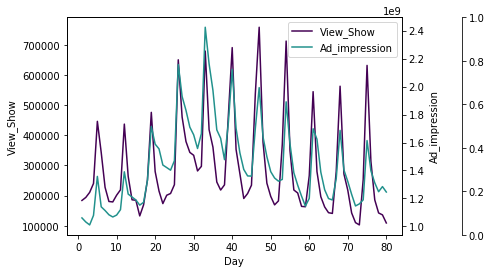

In [37]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")
color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")
lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))    

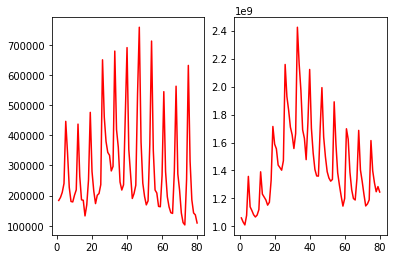

In [49]:
x=media['day']
y=media['Views_show']
y1=media['Ad_impression']
plt.subplot(1,2,1)
plt.plot(x,y, 'r-') # more on color options later
plt.subplot(1,2,2)
plt.plot(x,y1, 'r-')

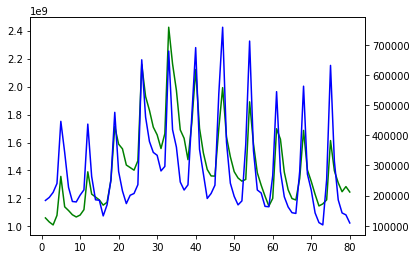

In [51]:
x = media['day']
y1 = media['Ad_impression']
y2 = media['Views_show']

ax2,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')   

(array([12., 26., 17.,  7.,  4.,  5.,  2.,  1.,  4.,  2.]),
 array([102520. , 168131.1, 233742.2, 299353.3, 364964.4, 430575.5,
        496186.6, 561797.7, 627408.8, 693019.9, 758631. ]),
 <a list of 10 Patch objects>)

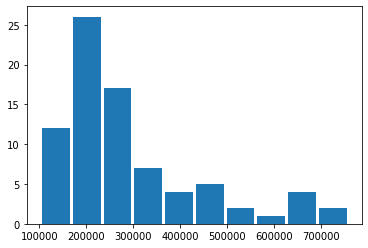

In [54]:
# Create the plot
plt.hist(media['Views_show'], histtype='bar', rwidth=0.9)

In [86]:
import datetime 
import calendar 
  
def findDay(date): 
    born = datetime.datetime.strptime(date, '%d %m %Y').weekday() 
    return (calendar.day_name[born]) 
  
# Driver program 
date = '1 03 2017'
print(findDay(date)) 

Wednesday


In [63]:
media['Weekend'] = pd.to_datetime(media['Date']).dt.dayofweek  # monday = 0, sunday = 6

In [73]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,WEEKDAY,Weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,6


In [65]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,WEEKDAY,Weekend
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,0,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,1,1
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,2,2
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,3,3
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,4,4


In [66]:
media['Weekend']

0     2
1     3
2     4
3     5
4     6
     ..
75    0
76    1
77    2
78    3
79    4
Name: Weekend, Length: 80, dtype: int64

In [87]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7   ### why add 3 --> 1st day was WEDNESDAY..
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,Weekend,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,2,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,3,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,4,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,5,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,6,1


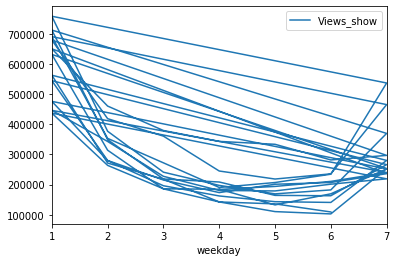

In [89]:
media.plot.line(x= 'weekday', y='Views_show')

<BarContainer object of 80 artists>

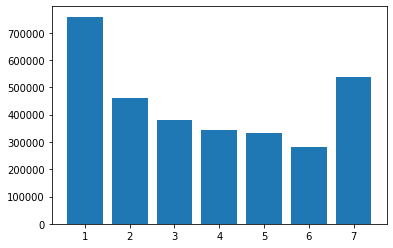

In [90]:
plt.bar(media['weekday'],media['Views_show'])

<BarContainer object of 80 artists>

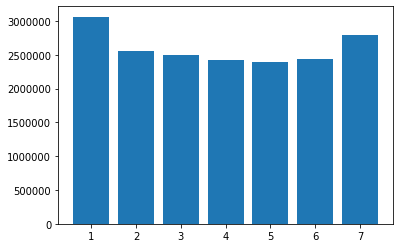

In [92]:
plt.bar(media['weekday'], media['Views_platform'])

# Running 1st model weekday & visters -- linear regresion


In [99]:

# #### Running first model (lm1) Weekday & visitors 

# Putting feature variable to X
X = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']


from sklearn.linear_model import LinearRegression


# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()




# fit the model to the training data
lm.fit(X,y)



import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())


C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.01e-12
Time:                        11:20:31   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [100]:
#Create Weekend variable, with value 1 at weekends and weekend 0 at weekdays

In [116]:
media['weekends'] = np.where((media['Date'].dt.dayofweek) < 5,0,1)

In [117]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekends
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [118]:
media.tail()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekends
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76,2,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77,3,0
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78,4,0
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79,5,0
79,2017-05-19,108961,1746735,2279036,1246026846,1,0,80,6,0


In [120]:

# #### Running first model (lm1) Weekday & visitors 

# Putting feature variable to X
X1 = media[['Visitors','weekends']]

# Putting response variable to y
y = media['Views_show']


from sklearn.linear_model import LinearRegression


# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()




# fit the model to the training data
lm.fit(X1,y)



import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X1 = sm.add_constant(X1)
# create a fitted model in one line
lm_1 = sm.OLS(y,X1).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.51e-12
Time:                        11:39:21   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [126]:

# #### Running first model (lm1) Weekday & visitors & charcacter_A

# Putting feature variable to X
X2 = media[['Visitors','weekends','Character_A']]

# Putting response variable to y
y = media['Views_show']


from sklearn.linear_model import LinearRegression


# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()




# fit the model to the training data
lm.fit(X2,y)



import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X2 = sm.add_constant(X2)
# create a fitted model in one line
lm_2 = sm.OLS(y,X2).fit()
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.53e-14
Time:                        11:49:32   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [123]:
media['Character_A'].value_counts()

0    50
1    30
Name: Character_A, dtype: int64

In [127]:

# #### Running first model (lm1) Weekday & visitors , Cricket_match_india , charcacter_A

# Putting feature variable to X
X3 = media[['Visitors','weekends','Character_A','Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

# fit the model to the training data
lm.fit(X3,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X3 = sm.add_constant(X3)
# create a fitted model in one line
lm_3 = sm.OLS(y,X3).fit()
print(lm_3.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.28
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           5.51e-14
Time:                        11:49:52   Log-Likelihood:                -1033.1
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      75   BIC:                             2088.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.074e+04   9

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [137]:

# #### Running first model (lm1) Weekday & visitors , Cricket_match_india , charcacter_A

# Putting feature variable to X
X4 = media[['Visitors','weekends','Character_A','Cricket_match_india','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

# fit the model to the training data
lm.fit(X4,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X4 = sm.add_constant(X4)
# create a fitted model in one line
lm_4 = sm.OLS(y,X4).fit()
print(lm_4.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     60.67
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           8.61e-25
Time:                        11:58:22   Log-Likelihood:                -1003.9
No. Observations:                  80   AIC:                             2020.
Df Residuals:                      74   BIC:                             2034.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.867e+05   7

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [138]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X4.columns

vif_data["VIF"] = [variance_inflation_factor(X4.values, i) 
                          for i in range(len(X4.columns))] 
  
print(vif_data)

               feature        VIF
0                const  78.444440
1             Visitors   1.597168
2             weekends   1.327164
3          Character_A   1.815758
4  Cricket_match_india   1.138646
5        Ad_impression   2.238807


In [153]:

# #### Running first model (lm1) Weekday & visitors , Cricket_match_india , charcacter_A

# Putting feature variable to X
X5 = media[['weekends','Character_A','weekday','Ad_impression']]

# Putting response variable to y
y = media['Views_show']

# fit the model to the training data
lm.fit(X5,y)

import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X5 = sm.add_constant(X5)
# create a fitted model in one line
lm_5 = sm.OLS(y,X5).fit()
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     143.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           2.31e-34
Time:                        12:07:34   Log-Likelihood:                -982.69
No. Observations:                  80   AIC:                             1975.
Df Residuals:                      75   BIC:                             1987.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.157e+05   6.38e+04      1.813

C:\Users\mrspider\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [154]:
#check VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = X5.columns

vif_data["VIF"] = [variance_inflation_factor(X5.values, i) 
                          for i in range(len(X5.columns))] 
  
print(vif_data)

         feature         VIF
0          const  111.603777
1       weekends    1.272655
2    Character_A    2.433022
3        weekday    1.963080
4  Ad_impression    3.817167
